## Hand Gesture Classification

Given *tabular data about four hand gestures*, let's try to classify the **gesture** of a given example.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/kyr7plus/emg-4

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

2025-05-30 00:10:21.696089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dfs = []

for label in ['0', '1', '2', '3']:
    dfs.append(pd.read_csv('archive/' + label + '.csv'))

In [3]:
dfs[0]

,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,-12.0,0.0,0.0,-7.0,-4.0,-3.0,-1.0,-5.0,4.0,-1.0,...,12.0,-3.0,0.0,2.0,-1.0,-1.0,4.0,-30.0,-20.0,0
2905,-9.0,-1.0,-2.0,1.0,-13.0,-14.0,-59.0,-4.0,-9.0,0.0,...,20.0,-4.0,0.0,0.0,0.0,-21.0,-10.0,-14.0,-29.0,0
2906,3.0,-2.0,-2.0,4.0,18.0,-5.0,-31.0,7.0,-3.0,-3.0,...,34.0,-7.0,4.0,4.0,2.0,1.0,4.0,-55.0,-4.0,0
2907,-2.0,-2.0,-2.0,1.0,-3.0,-17.0,-33.0,-13.0,3.0,2.0,...,-4.0,0.0,3.0,0.0,5.0,9.0,8.0,-13.0,11.0,0


In [4]:
dfs[1]

,-7.0,-1.0,-1.0.1,0.0,-10.0,-10.0.1,-1.0.2,1.0,-5.0,-5.0.1,...,6.0.1,-4.0.6,-3.0.5,-5.0.5,-3.0.6,15.0.1,11.0,-4.0.7,-5.0.6,1
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,...,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.0,1.0,-2.0,-2.0,-11.0,-12.0,-2.0,-9.0,-7.0,-3.0,...,-7.0,-6.0,-1.0,0.0,1.0,38.0,-8.0,0.0,4.0,1
2898,-4.0,-4.0,1.0,-1.0,-52.0,-4.0,-1.0,-2.0,9.0,-1.0,...,0.0,-4.0,3.0,1.0,8.0,17.0,0.0,0.0,-7.0,1
2899,26.0,2.0,0.0,-1.0,20.0,-1.0,1.0,-4.0,18.0,-1.0,...,-7.0,10.0,0.0,-3.0,2.0,34.0,42.0,3.0,6.0,1
2900,-3.0,4.0,7.0,4.0,-26.0,-32.0,-3.0,-2.0,5.0,1.0,...,1.0,-1.0,0.0,1.0,-1.0,4.0,1.0,0.0,-5.0,1


In [5]:
for df in dfs:
    df.columns = list(range(len(df.columns)))

In [6]:
dfs[0]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,-12.0,0.0,0.0,-7.0,-4.0,-3.0,-1.0,-5.0,4.0,-1.0,...,12.0,-3.0,0.0,2.0,-1.0,-1.0,4.0,-30.0,-20.0,0
2905,-9.0,-1.0,-2.0,1.0,-13.0,-14.0,-59.0,-4.0,-9.0,0.0,...,20.0,-4.0,0.0,0.0,0.0,-21.0,-10.0,-14.0,-29.0,0
2906,3.0,-2.0,-2.0,4.0,18.0,-5.0,-31.0,7.0,-3.0,-3.0,...,34.0,-7.0,4.0,4.0,2.0,1.0,4.0,-55.0,-4.0,0
2907,-2.0,-2.0,-2.0,1.0,-3.0,-17.0,-33.0,-13.0,3.0,2.0,...,-4.0,0.0,3.0,0.0,5.0,9.0,8.0,-13.0,11.0,0


In [7]:
dfs[1]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,...,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.0,1.0,-2.0,-2.0,-11.0,-12.0,-2.0,-9.0,-7.0,-3.0,...,-7.0,-6.0,-1.0,0.0,1.0,38.0,-8.0,0.0,4.0,1
2898,-4.0,-4.0,1.0,-1.0,-52.0,-4.0,-1.0,-2.0,9.0,-1.0,...,0.0,-4.0,3.0,1.0,8.0,17.0,0.0,0.0,-7.0,1
2899,26.0,2.0,0.0,-1.0,20.0,-1.0,1.0,-4.0,18.0,-1.0,...,-7.0,10.0,0.0,-3.0,2.0,34.0,42.0,3.0,6.0,1
2900,-3.0,4.0,7.0,4.0,-26.0,-32.0,-3.0,-2.0,5.0,1.0,...,1.0,-1.0,0.0,1.0,-1.0,4.0,1.0,0.0,-5.0,1


In [8]:
data = pd.concat([df for df in dfs], axis=0).reset_index(drop=True)
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11674 entries, 0 to 11673
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11674 non-null  float64
 1   1       11674 non-null  float64
 2   2       11674 non-null  float64
 3   3       11674 non-null  float64
 4   4       11674 non-null  float64
 5   5       11674 non-null  float64
 6   6       11674 non-null  float64
 7   7       11674 non-null  float64
 8   8       11674 non-null  float64
 9   9       11674 non-null  float64
 10  10      11674 non-null  float64
 11  11      11674 non-null  float64
 12  12      11674 non-null  float64
 13  13      11674 non-null  float64
 14  14      11674 non-null  float64
 15  15      11674 non-null  float64
 16  16      11674 non-null  float64
 17  17      11674 non-null  float64
 18  18      11674 non-null  float64
 19  19      11674 non-null  float64
 20  20      11674 non-null  float64
 21  21      11674 non-null  float64
 22

In [10]:
print("Total missing values: ", data.isna().sum().sum())

Total missing values:  0


#### Split and Scale

In [11]:
y = data[64].copy()
X = data.drop(64, axis=1).copy()

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,22.0,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0


In [13]:
# Scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-2.50343078, -0.44802929, -0.85411866, ...,  0.83661801,
         4.45193813,  1.00504767],
       [-0.99531905, -0.61800131, -1.45538386, ...,  0.83661801,
         4.5707158 ,  3.12984296],
       [ 0.13576475,  0.31684479,  0.14799001, ...,  1.54103892,
         4.7686786 ,  2.80790428],
       ...,
       [-0.02581865, -0.19307127, -0.05243173, ..., -1.12010676,
        -0.14079879,  0.03923162],
       [ 0.08190362,  0.4018308 ,  0.94967694, ..., -3.50731098,
         0.17594168,  0.3611703 ],
       [-0.07967978,  0.4018308 ,  0.54883347, ...,  2.51940131,
         0.49268216,  0.3611703 ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Training

In [15]:
X_train.shape

(8171, 64)

In [16]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50


2025-05-30 00:10:23.908206: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


205/205 [==============================] - 6s 28ms/step - loss: 0.7114 - accuracy: 0.7171 - val_loss: 0.3395 - val_accuracy: 0.8795 - lr: 0.0010
Epoch 2/50
205/205 [==============================] - 6s 29ms/step - loss: 0.2791 - accuracy: 0.9006 - val_loss: 0.3055 - val_accuracy: 0.9003 - lr: 0.0010
Epoch 3/50
205/205 [==============================] - 5s 22ms/step - loss: 0.1721 - accuracy: 0.9429 - val_loss: 0.2829 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 4/50
205/205 [==============================] - 5s 22ms/step - loss: 0.1363 - accuracy: 0.9529 - val_loss: 0.2914 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 5/50
205/205 [==============================] - 6s 31ms/step - loss: 0.0982 - accuracy: 0.9662 - val_loss: 0.2641 - val_accuracy: 0.9303 - lr: 0.0010
Epoch 6/50
205/205 [==============================] - 6s 30ms/step - loss: 0.1123 - accuracy: 0.9640 - val_loss: 0.2519 - val_accuracy: 0.9309 - lr: 0.0010
Epoch 7/50
205/205 [==============================] - 7s 34ms/step - loss: 

### Results

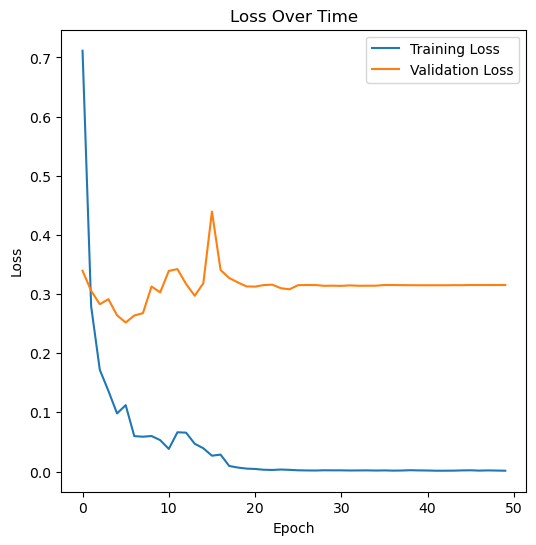

In [17]:
plt.figure(figsize=(6,6))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")
plt.show()

In [18]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 1s 9ms/step - loss: 0.2094 - accuracy: 0.9495


[0.20940370857715607, 0.9494718909263611]

In [19]:
model.predict(X_test)

110/110 [==============================] - 1s 6ms/step


array([[5.6043326e-10, 2.4265041e-23, 1.0000000e+00, 3.9506587e-15],
       [4.9818917e-03, 4.0493325e-13, 9.9501812e-01, 3.2727310e-10],
       [2.9566117e-13, 9.9999928e-01, 6.9059638e-08, 5.8933091e-07],
       ...,
       [3.4808178e-08, 4.8264801e-06, 9.9999511e-01, 6.0124449e-08],
       [2.6662895e-12, 4.2608413e-15, 1.0422640e-07, 9.9999988e-01],
       [9.9999988e-01, 4.7984187e-31, 2.2988445e-12, 1.4460636e-07]],
      dtype=float32)

In [20]:
y_true = np.array(y_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

110/110 [==============================] - 1s 6ms/step


In [21]:
y_pred

5928     2
6428     2
5808     1
8990     3
10054    3
        ..
3682     1
10859    3
7479     2
11035    3
1272     0
Name: 64, Length: 3503, dtype: int64

In [22]:
y_true

array([2, 2, 1, ..., 2, 3, 0])

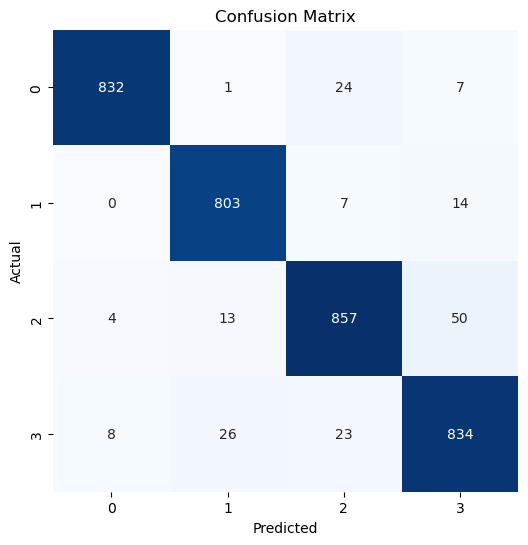

In [24]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       864
           1       0.95      0.97      0.96       824
           2       0.94      0.93      0.93       924
           3       0.92      0.94      0.93       891

    accuracy                           0.95      3503
   macro avg       0.95      0.95      0.95      3503
weighted avg       0.95      0.95      0.95      3503

